In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
DEBUG=False
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


In [3]:
from denoisplit.data_loader.multifile_dset import MultiFileDset, DataSplitType
from denoisplit.core.model_type import ModelType

from denoisplit.configs.sox2golgi_config import get_config 
config = get_config()
datapath = '/group/jug/ashesh/data/TavernaSox2Golgi/'
normalized_input = config.data.normalized_input
use_one_mu_std = config.data.use_one_mu_std
train_aug_rotate = config.data.train_aug_rotate
enable_random_cropping = config.data.deterministic_grid is False
lowres_supervision = config.model.model_type == ModelType.LadderVAEMultiTarget

train_data_kwargs = {}
val_data_kwargs = {}
train_data_kwargs['enable_random_cropping'] = enable_random_cropping
val_data_kwargs['enable_random_cropping'] = False
train_data = MultiFileDset(config.data,
    datapath,
    datasplit_type=DataSplitType.Train,
    val_fraction=config.training.val_fraction,
    test_fraction=config.training.test_fraction,
    normalized_input=normalized_input,
    use_one_mu_std=use_one_mu_std,
    enable_rotation_aug=train_aug_rotate,
    **train_data_kwargs)

mean_val, std_val = train_data.compute_mean_std()
train_data.set_mean_std(mean_val, std_val)
max_val = train_data.get_max_val()
val_data = MultiFileDset(
        config.data,
        datapath,
        datasplit_type=DataSplitType.Val,
        val_fraction=config.training.val_fraction,
        test_fraction=config.training.test_fraction,
        normalized_input=normalized_input,
        use_one_mu_std=use_one_mu_std,
        enable_rotation_aug=False,  # No rotation aug on validation
        max_val=max_val,
        **val_data_kwargs,
    )


Loaded from TwoChannel /group/jug/ashesh/data/TavernaSox2Golgi/ 306
[SingleFileDset] Sz:64 Train:1 N:1 NumPatchPerN:256 NormInp:True SingleNorm:True Rot:False RandCrop:True Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1555, avg width: 1555, count: 306
Loaded from TwoChannel /group/jug/ashesh/data/TavernaSox2Golgi/ 39
[SingleFileDset] Sz:64 Train:0 N:1 NumPatchPerN:256 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1379, avg width: 1379, count: 39


In [4]:
len(train_data)

188808

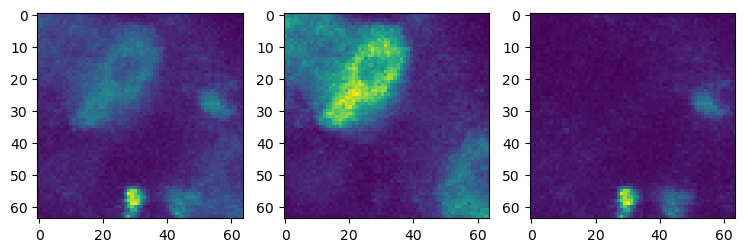

In [5]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(9,3),ncols=3)
inp, tar = train_data[0]

ax[0].imshow(inp[0])
ax[1].imshow(tar[0])
ax[2].imshow(tar[1])